<a href="https://colab.research.google.com/github/nisher07/Olympics-Winter-Games-Data-Analysis/blob/main/olympic_winter_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bioinfokit

# Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_rel
from bioinfokit.analys import stat
from scipy.stats import norm
from scipy.stats import f_oneway

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Describe

In [ ]:
df = pd.read_csv('WinterGames.csv')

In [ ]:
df.head()

,olympics,discipline,sex,age
0,2022,Snowboard,f,24
1,2022,Snowboard,f,28
2,2022,Snowboard,f,26
3,2022,Snowboard,f,26
4,2022,Snowboard,f,26


In [ ]:
df.shape

(749, 4)

In [ ]:
df.dtypes

olympics       int64
discipline    object
sex           object
age            int64
dtype: object

In [ ]:
df.isnull().sum()

olympics      0
discipline    0
sex           0
age           0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
olympics,749.0,2017.855808,3.250756,2014.0,2014.0,2018.0,2022.0,2022.0
age,749.0,25.882510,4.901661,17.0,22.0,26.0,29.0,45.0


In [ ]:
#variance
df['age'].var()

24.02628460050129

In [ ]:
df.describe(include=['object'])

,discipline,sex
count,749,749
unique,2,2
top,Ski,m
freq,559,403


In [ ]:
df.mode()

,olympics,discipline,sex,age
0,2014,Ski,m,26


## which age people participate in Olympic games most

In [ ]:
age_tmp = pd.crosstab(index=df["age"], columns="count")
age_tmp.reset_index(inplace=True)
age_tmp[age_tmp['count'] == df.age.value_counts().max()]

col_0,age,count
9,26,72


In [ ]:
df.corr()

,olympics,age
olympics,1.000000,0.104987
age,0.104987,1.000000


# **percentage of discipline**

Text(0.5, 0, 'Discipline')

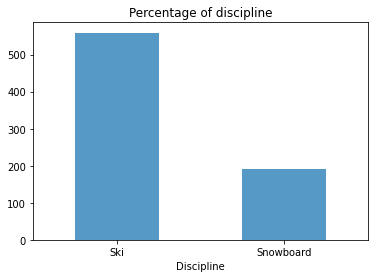

In [ ]:
df["discipline"].value_counts().plot(kind="bar", alpha=0.75, rot=0)
plt.title("Percentage of discipline")
plt.xlabel("Discipline")

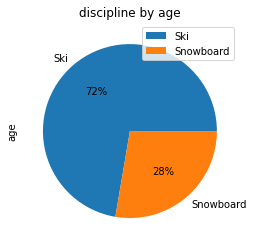

In [ ]:
df.groupby(['discipline']).sum().plot(kind='pie', y='age', autopct='%1.0f%%', title='discipline by age')

# **Q1 Age differenec between snowboard and skiing athletes**

In [ ]:
df["discipline"].value_counts()

Ski          559
Snowboard    190
Name: discipline, dtype: int64

In [ ]:
df[["discipline", "age"]].groupby("discipline").mean()

,age
discipline,
Ski,25.080501
Snowboard,28.242105


In [ ]:
df[["sex", "age"]].groupby("sex").mean()

,age
sex,
f,25.222543
m,26.449132


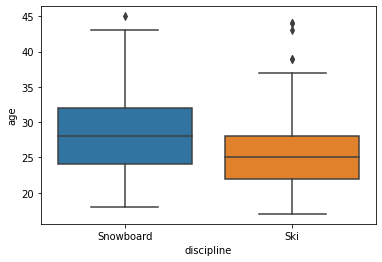

In [ ]:
sns.boxplot(x="discipline", y="age", data=df)

# **Q2 age difference between female snowboard and female skiing**

In [ ]:
new_df = df[df['sex'] == 'f']

In [ ]:
new_df

,olympics,discipline,sex,age
0,2022,Snowboard,f,24
1,2022,Snowboard,f,28
2,2022,Snowboard,f,26
3,2022,Snowboard,f,26
4,2022,Snowboard,f,26
...,...,...,...,...
712,2014,Snowboard,f,26
713,2014,Snowboard,f,27
714,2014,Snowboard,f,24
715,2014,Snowboard,f,23


In [ ]:
year_dis_sex_age = new_df.groupby(['discipline','sex'],as_index=False).age.mean()

In [ ]:
year_dis_sex_age

,discipline,sex,age
0,Ski,f,24.607143
1,Snowboard,f,26.872340


# **Q1 t test**

In [ ]:
res = stat()
# for unequal variance t-test (Welch's t-test) set evar=False
res.ttest(df=df, xfac="discipline", res="age", test_type=2, evar=False)
print(res.summary)




Two sample t-test with unequal variance (Welch's t-test)

------------------  -------------
Mean diff            -3.1616
t                    -7.32673
Std Error             0.431516
df                  284.057
P-value (one-tail)    1.22628e-12
P-value (two-tail)    2.45256e-12
Lower 95.0%          -4.01098
Upper 95.0%          -2.31223
------------------  -------------

Parameter estimates

Level        Number     Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
---------  --------  -------  ---------  -----------  -------------  -------------
Ski             559  25.0805    4.47041     0.189078        24.7091        25.4519
Snowboard       190  28.2421    5.34664     0.387886        27.477         29.0072



# **Q1 ANOVA test one way**

In [ ]:
b = df.query('discipline == "Ski"')['age']
a = df.query('discipline == "Snowboard"')['age']
stat, p = f_oneway(b, a)
print('stat=%.3f, p=%.17f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=63.960, p=0.00000000000000483
Probably different distributions


# **Q2 ANOVA test**

In [ ]:
c = new_df.query('discipline == "Ski"')['age']
d = new_df.query('discipline == "Snowboard"')['age']
stat, p = f_oneway(c, d)
print('stat=%.3f, p=%.12f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=17.057, p=0.000045576522
Probably different distributions


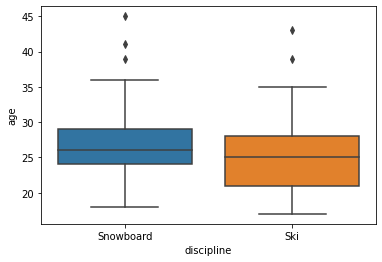

In [ ]:
sns.boxplot(x="discipline", y="age", data=new_df)